In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold
)
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    plot_confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
random = 42
np.random.seed(42)

In [3]:
df = pd.read_csv("weight_lifting.csv", header=1)
df = df.drop(columns=['user_name', 'new_window','cvtd_timestamp'])
df = df.fillna(0)
df

,raw_timestamp_part_1,raw_timestamp_part_2,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1322489729,34670,1,3.70,41.6,-82.80,3,0.000000,0,0,...,-0.05,-0.37,-0.43,-170,155,184,-1160,1400,-876,E
1,1322489729,62641,1,3.66,42.8,-82.50,2,0.000000,0,0,...,-0.06,-0.37,-0.59,-178,164,182,-1150,1410,-871,E
2,1322489729,70653,1,3.58,43.7,-82.30,1,0.000000,0,0,...,-0.05,-0.27,-0.72,-182,172,185,-1130,1400,-863,E
3,1322489729,82654,1,3.56,44.4,-82.10,1,0.000000,0,0,...,0.02,-0.24,-0.79,-185,182,188,-1120,1400,-855,E
4,1322489729,90637,1,3.57,45.1,-81.90,1,0.000000,0,0,...,0.08,-0.27,-0.82,-188,195,188,-1100,1400,-843,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,1323095020,748318,91,122.00,25.7,-3.25,19,0.000000,0,0,...,-0.31,2.26,1.07,133,336,-126,-262,793,829,C
4020,1323095020,792346,91,122.00,25.7,-3.19,19,0.000000,0,0,...,-0.29,2.04,1.08,139,333,-132,-224,791,804,C
4021,1323095020,792551,91,122.00,25.6,-3.12,19,0.000000,0,0,...,-0.18,2.06,1.05,147,335,-139,-184,770,759,C
4022,1323095020,856300,91,122.00,25.6,-3.06,19,0.000000,0,0,...,-0.06,2.09,1.02,149,333,-148,-161,768,750,C


In [64]:
df.shape

(4024, 159)

In [82]:
df.groupby('classe').size()

classe
A    1365
B     901
C     112
D     276
E    1370
dtype: int64

In [5]:
columns = ['kurtosis_picth_belt', 'kurtosis_yaw_belt', 'skewness_roll_belt.1',
           'skewness_yaw_belt', 'kurtosis_roll_arm', 'kurtosis_picth_arm',
           'kurtosis_yaw_arm', 'skewness_roll_arm', 'skewness_pitch_arm',
           'skewness_yaw_arm', 'kurtosis_yaw_dumbbell', 'skewness_yaw_dumbbell',
           'kurtosis_roll_forearm', 'kurtosis_picth_forearm', 'kurtosis_yaw_forearm',
           'skewness_roll_forearm', 'skewness_pitch_forearm', 'skewness_yaw_forearm',
           'max_yaw_forearm', 'min_yaw_forearm', 'amplitude_yaw_forearm']
for col in columns:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace('#DIV/0!', '0')

In [6]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [7]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d arr

LR: 0.344600 (0.000458)


/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d arr

LDA: 0.978129 (0.005969)


/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/patrick/.local/pipx/venvs/jupyter/lib/pyth

KNN: 0.585171 (0.020373)
CART: 0.996688 (0.002565)


/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d arr

NB: 0.654418 (0.051592)


/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/patrick/.local/pipx/venvs/jupyter/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d arr

SVM: 0.344600 (0.000458)


In [8]:
for name, result in zip(names, results):
    print('%s: %f (%f)' % (name, result.mean(), result.std()))

LR: 0.344600 (0.000458)
LDA: 0.978129 (0.005969)
KNN: 0.585171 (0.020373)
CART: 0.996688 (0.002565)
NB: 0.654418 (0.051592)
SVM: 0.344600 (0.000458)


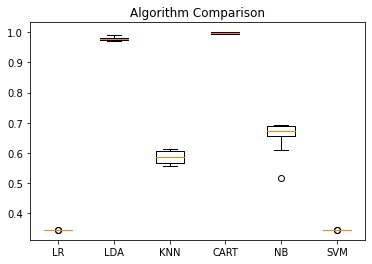

In [9]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [10]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

### Evaluate predictions

In [11]:
accuracy_score(y_test, predictions)

0.9990059642147118

In [12]:
confusion_matrix(y_test, predictions)

array([[325,   0,   0,   0,   0],
       [  0, 218,   0,   0,   0],
       [  0,   0,  26,   0,   0],
       [  0,   0,   0,  64,   1],
       [  0,   0,   0,   0, 372]])

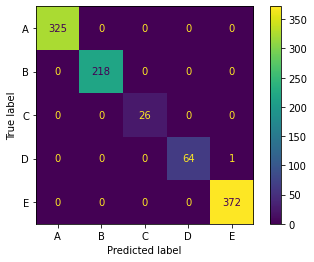

In [13]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [112]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       354
           B       1.00      1.00      1.00       202
           C       1.00      1.00      1.00        27
           D       0.99      0.97      0.98        72
           E       1.00      1.00      1.00       351

    accuracy                           1.00      1006
   macro avg       1.00      0.99      0.99      1006
weighted avg       1.00      1.00      1.00      1006

